In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('q3.csv',header = None)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], test_size = 0.2, shuffle = True, random_state = 1)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

## SVM Classifier
* Using X_train_scaled gave the same result. (Codes not shown)

In [4]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = {'C': C}
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid = parameters, cv = 3)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'C': 0.1}

In [5]:
svc = SVC(C = 0.1)
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_SVM = np.sum(np.diagonal(conf_matrix)) / len(pred)

print ("The confusion matrix is:\n", conf_matrix)
print("The accuracy of SVM is "+str(round(accuracy_SVM,3)*100)+"%.")

The confusion matrix is:
 [[19  0]
 [ 2 13]]
The accuracy of SVM is 94.1%.


## NN Classifier
* Setting the solver from ’adam’ to 'lbfgs' to solve convergence error. 
* Solver 'lbfgs' is using a constant learning_rate 0.001. We only tuned alpha in this case.
* Without setting a random seed, result will be constantly changing

In [6]:
np.random.seed(3)
learning_rate_init = [0.00001, 0.0001, 0.001, 0.01, 0.1] 
parameters = {'learning_rate_init': learning_rate_init}
grid_search = GridSearchCV(neural_network.MLPClassifier(hidden_layer_sizes = (5, 2), solver = 'lbfgs'), param_grid = parameters, cv = 3)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'learning_rate_init': 0.01}

In [7]:
#grid_search.cv_results_

In [8]:
np.random.seed(3)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.01)
NN.fit(X_train, Y_train)
pred = NN.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
print ("The confusion matrix is:\n",conf_matrix)
print("The accuracy of NN is "+str(round(accuracy_NN,3)*100)+"%.")

The confusion matrix is:
 [[19  0]
 [ 2 13]]
The accuracy of NN is 94.1%.


In [9]:
# Different random seed causes a lower accuracy

data = pd.read_csv('q3.csv',header = None)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:2], data.iloc[:,-1], test_size=0.2,shuffle=True,random_state=1)

np.random.seed(54)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.01)
NN.fit(X_train, Y_train)

pred = NN.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
print ("The confusion matrix is:\n",conf_matrix)
print("The accuracy of NN is "+str(round(accuracy_NN,3)*100)+"%.")

The confusion matrix is:
 [[ 0 19]
 [ 0 15]]
The accuracy of NN is 44.1%.


In [10]:
# NN.get_params

### Using X_train_scaled gave a worse result

In [11]:
np.random.seed(3)
learning_rate_init = [0.00001, 0.0001, 0.001, 0.01, 0.1] 
parameters = {'learning_rate_init': learning_rate_init}
grid_search = GridSearchCV(neural_network.MLPClassifier(hidden_layer_sizes = (5, 2), solver = 'lbfgs'), param_grid = parameters, cv = 3)
grid_search.fit(X_train_scaled, Y_train)
grid_search.best_params_

{'learning_rate_init': 1e-05}

In [12]:
np.random.seed(3)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.01)
NN.fit(X_train_scaled, Y_train)
pred = NN.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
print ("The confusion matrix is:\n",conf_matrix)
print("The accuracy of NN is "+str(round(accuracy_NN,3)*100)+"%.")

The confusion matrix is:
 [[ 8 11]
 [ 0 15]]
The accuracy of NN is 67.60000000000001%.


## Draw decision boundary

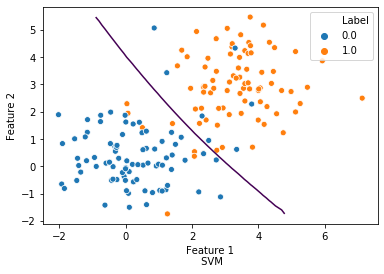

In [13]:
data = pd.read_csv('q3.csv',header = None)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:2], data.iloc[:,-1], test_size=0.2,shuffle=True,random_state=1)

svc = SVC(C = 0.1, probability = True)
svc.fit(X_train, Y_train)

# np.linspace returns evenly spaced numbers (default 50) over a specified interval
# np.meshgrid returns coordinate matrices. Because there will be 50*50 points, xx.shape is (50,50)
xx, yy = np.meshgrid(np.linspace(data.iloc[:,0:1].min(), data.iloc[:,0:1].max()),
                     np.linspace(data.iloc[:,1:2].min(), data.iloc[:,1:2].max()))
# np.c_ is used to concatenate (a1, a2, ...), axis=0
# Z shape is (n_samples, n_classes). Column 0 is the prob. in class 0.
Z =svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z[:, 1].reshape(xx.shape)
# data.iloc[:,-1] is a Pandas series
p1 = sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=data.iloc[:,-1].rename("Label"))

# Z.shape is equal to xx.shape
# [levels] can be an array
p1.contour(xx, yy, Z, [0.5])

p1.set_xlabel('Feature 1\n SVM')
p1.set_ylabel('Feature 2')

plt.show()

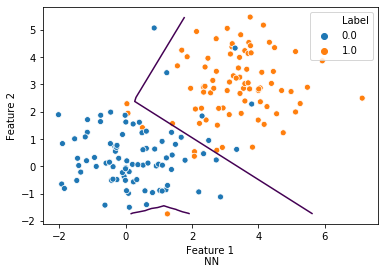

In [14]:
data = pd.read_csv('q3.csv',header = None)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:2], data.iloc[:,-1], test_size=0.2,shuffle=True,random_state=1)

np.random.seed(3)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.01)
NN.fit(X_train, Y_train)

# np.linspace returns evenly spaced numbers (default 50) over a specified interval
# np.meshgrid returns coordinate matrices. Because there will be 50*50 points, xx.shape is (50,50)
xx, yy = np.meshgrid(np.linspace(data.iloc[:,0:1].min(), data.iloc[:,0:1].max()),
                     np.linspace(data.iloc[:,1:2].min(), data.iloc[:,1:2].max()))
# np.c_ is used to concatenate (a1, a2, ...), axis=0
# Z shape is (n_samples, n_classes). Column 0 is the prob. in class 0.
Z = NN.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z[:, 1].reshape(xx.shape)

# data.iloc[:,-1] is a Pandas series
p1 = sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=data.iloc[:,-1].rename("Label"))

# Z.shape is equal to xx.shape
# [levels] can be an array
p1.contour(xx, yy, Z, [0.5])

p1.set_xlabel('Feature 1\n NN')
p1.set_ylabel('Feature 2')

plt.show()

/Users/Andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


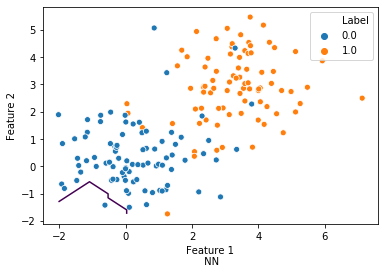

In [15]:
data = pd.read_csv('q3.csv',header = None)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:2], data.iloc[:,-1], test_size=0.2,shuffle=True,random_state=1)

np.random.seed(54)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.01)
NN.fit(X_train, Y_train)

# np.linspace returns evenly spaced numbers (default 50) over a specified interval
# np.meshgrid returns coordinate matrices. Because there will be 50*50 points, xx.shape is (50,50)
xx, yy = np.meshgrid(np.linspace(data.iloc[:,0:1].min(), data.iloc[:,0:1].max()),
                     np.linspace(data.iloc[:,1:2].min(), data.iloc[:,1:2].max()))
# np.c_ is used to concatenate (a1, a2, ...), axis=0
# Z shape is (n_samples, n_classes). Column 0 is the prob. in class 0.
Z = NN.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z[:, 1].reshape(xx.shape)

# data.iloc[:,-1] is a Pandas series
p1 = sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=data.iloc[:,-1].rename("Label"))

# Z.shape is equal to xx.shape
# [levels] can be an array
p1.contour(xx, yy, Z, [0.5])

p1.set_xlabel('Feature 1\n NN')
p1.set_ylabel('Feature 2')

plt.show()

## Part 2

In [16]:
data = pd.read_csv("data.dat", sep='\s+',header=None).T
label = pd.read_csv("label.dat",sep='\s+',header=None).T
label[label[0] == 2] = 0
label[label[0] == 6] = 1

X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size = 0.2, shuffle = True, random_state = 1)

### SVM

In [17]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = {'C': C}
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid = parameters, cv = 3)
grid_search.fit(X_train, Y_train.values.ravel())
grid_search.best_params_

{'C': 10}

In [18]:
svc = SVC(C = 10)
svc.fit(X_train, Y_train.values.ravel())
pred = svc.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_SVM = np.sum(np.diagonal(conf_matrix)) / len(pred)

print ("The confusion matrix is:\n", conf_matrix)
print("The accuracy of SVM is "+str(round(accuracy_SVM,3)*100)+"%.")

The confusion matrix is:
 [[191   1]
 [  1 205]]
The accuracy of SVM is 99.5%.


### NN

In [19]:
np.random.seed(3)
learning_rate_init = [0.00001, 0.0001, 0.001, 0.01, 0.1] 
parameters = {'learning_rate_init': learning_rate_init}
grid_search = GridSearchCV(neural_network.MLPClassifier(hidden_layer_sizes = (5, 2), solver = 'lbfgs'), param_grid = parameters, cv = 3)
grid_search.fit(X_train, Y_train.values.ravel())
grid_search.best_params_

{'learning_rate_init': 0.1}

In [20]:
np.random.seed(3)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.1)
NN.fit(X_train, Y_train.values.ravel())
pred = NN.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
print ("The confusion matrix is:\n",conf_matrix)
print("The accuracy of NN is "+str(round(accuracy_NN,3)*100)+"%.")

The confusion matrix is:
 [[191   1]
 [  3 203]]
The accuracy of NN is 99.0%.


In [21]:
np.random.seed(41)

NN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', learning_rate_init = 0.1)
NN.fit(X_train, Y_train.values.ravel())
pred = NN.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
print ("The confusion matrix is:\n",conf_matrix)
print("The accuracy of NN is "+str(round(accuracy_NN,4)*100)+"%.")

The confusion matrix is:
 [[192   0]
 [206   0]]
The accuracy of NN is 48.24%.


## Back-up codes, do not run them

In [ ]:
np.random.seed(3)
learning_rate_init = [0.00001, 0.0001, 0.001, 0.01, 0.1] 
parameters = {'learning_rate_init': learning_rate_init}
grid_search = GridSearchCV(neural_network.MLPClassifier(hidden_layer_sizes = (5, 2), solver = 'lbfgs'), param_grid = parameters, cv = 3)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

In [ ]:
for n in range(100): 
    np.random.seed(n)
    NNN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), solver = 'lbfgs', alpha = 0.1)
    NN.fit(X_train, Y_train.values.ravel())
    pred = NN.predict(X_test)
    conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
    accuracy_NN = np.sum(np.diagonal(conf_matrix))/len(pred)
    if accuracy_NN<0.9:
        print(n)
        print("The accuracy of SVM is "+str(round(accuracy_NN,3)*100)+"%.")